In [7]:
import pandas as pd
import numpy as np
import lattice.paths as paths
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union
from pathlib import Path
import time

    
def aggregate_data(dataset: Union[str,Path]):
    data = dict()
    for path in dataset.iterdir():
        df = pd.read_parquet(path)
        df['log_ret'] = np.log(df.close) - np.log(df.close.shift(1))
        data[path.name.split('.')[0]] = df.iloc[1:]
    return data

## Loading Data

In [8]:
dirs = list(paths.data.iterdir())
print(dirs[1])
data = aggregate_data(dirs[1])

/home/magi/projects/lattice/data/365_days_900_seconds


## Inspecting Correlations

In [9]:
df = pd.DataFrame()
for market in data:
    df[market] = data[market].log_ret

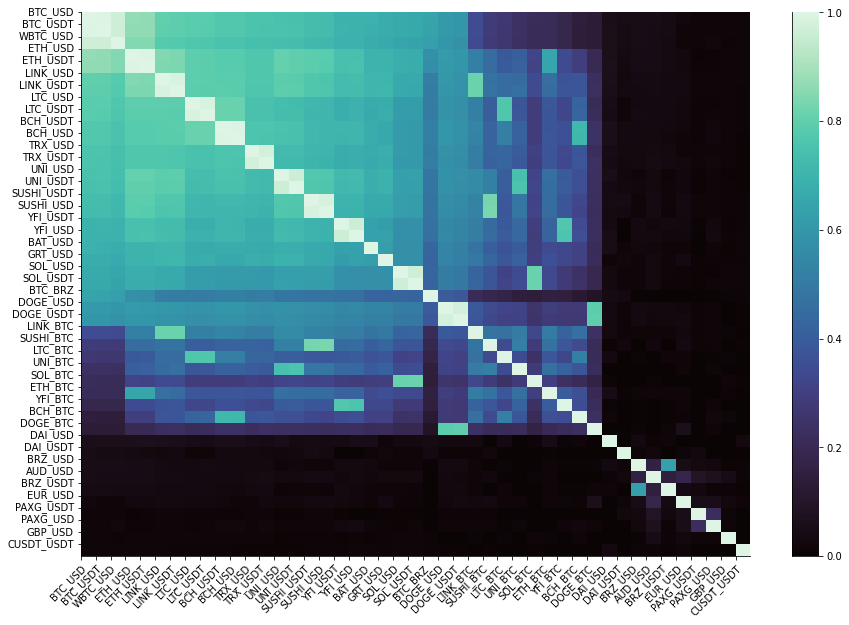

In [10]:
N = 45
S = df.corr()
labels = S['BTC_USD'].sort_values(ascending=False).index[:N]
S = S[labels].loc[labels]
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(S, vmin=0, vmax=1, cmap='mako')
ax.set_xticks(np.arange(len(labels)), labels=labels)
ax.set_yticks(np.arange(len(labels)), labels=labels)
plt.setp(
    ax.get_xticklabels(), 
    rotation=45, 
    ha="right",
    rotation_mode="anchor"
)
sns.despine()
plt.show()

# Experimentation

In [11]:
from lattice.wallet import *
from lattice.broker import *
from lattice.market import *
from lattice.investor import *

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
config = {
    'market':{
        'dataset': '365_days_60_seconds',
        'window': ['2022-02-01', '2022-03-01'],
        'assets': ['BTC_USD']
    },
    'wallet':{
        'balances':{'USD': 10000}
    },
    'broker':{
        
    }
}

In [3]:
market = LocalMarket(config=config['market'])
wallet = LocalWallet(config=config['wallet'])
broker = LocalBroker(config=config['broker'])
investor = BernoulliInvestor(wallet, market, broker, p=[.5,.5])

In [4]:
while not investor.evaluate_market():
    pass

In [5]:
df = investor.wallet.get_history()

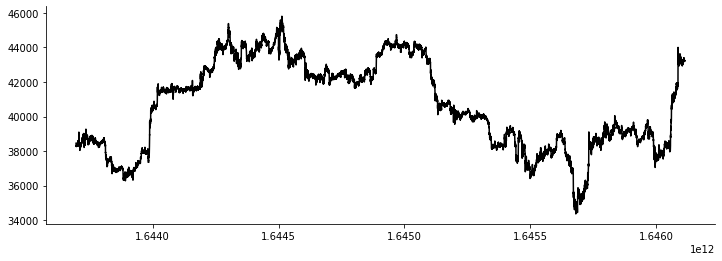

$9831.37


In [6]:
btc = market.data['BTC_USD']
N = btc.shape[0]
history = investor.wallet.history
plt.figure(figsize = (12,4))
plt.plot(btc.time, btc.close, color='k')
sns.despine()
plt.show()
tot_val = investor.wallet.total_value
print(f'${tot_val:.2f}')